#EMPLOYEE SENTIMENT ANALYSIS


In [ ]:
#Install the necessary packages
!pip install scikit-learn
!pip install cython
!pip install --force-reinstall gensim[Cython]
!pip install tensorflow
!pip install vaderSentiment

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from random import sample
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Bidirectional
from keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Input
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SimpleRNN, LSTM
from tensorflow.keras import mixed_precision
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# DATA PREPROCESSING
The purpose of this analysis is to conduct a sentiment analysis on the employee feedback to have an overview on how the employees feel about the business. The data preprocessing will follow the data preprocesing process such as handling of missing data, cleaning text, data tokeization, punctation removal.

In [ ]:
#Import and load the dataset to conduct the sentiment analysis
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capgemini_Employee_Reviews.csv')
df

,Title,Department,Job_type,Sentiment,Rating,Likes,Dislikes
0,Senior Consultant,General Insurance Department,Full Time,Positive,4,Deserved candidates are promoted promptly.\nUn...,With designation no promotions badsalary incre...
1,Senior Software Engineer,Software Development Department,Full Time,Neutral,3,You got lot of learning platform and monthly l...,You will get fully not tech horrible project m...
2,Senior Consultant,Software Development Department,Full Time,Positive,4,Based on which Business Unit you are you will ...,Some top level management people bring bad nam...
3,Senior Consultant,Banking Operations Department,Full Time,Negative,1,Some client projects are good as they use the ...,"Culture, micro management, unprofessional beha..."
4,Team Lead,IT Infrastructure Services Department,Full Time,Positive,4,"I have worked in IBM (4 years) ,TCS (1 year) ,...",Medical insurance amount is quite low compare ...
...,...,...,...,...,...,...,...
5494,Trainee,"Operations, Maintenance & Support Department",Full Time,Positive,4,Good all things,horrible seems bad
5495,Associate Consultant,Software Development Department,Full Time,Positive,4,Great company.\nGood place to learn.\nSupporti...,horrible much.
5496,Consultant,IT Consulting Department,Full Time,Positive,5,Ok,horrible as been identified till now
5497,Senior Software Engineer,Quality Assurance and Testing Department,Full Time,Positive,4,Good working culture,Need to improve budget


In [ ]:
# Understanding the clear structure of the dataset by checking the first few rows
df.head()
#Checking for missing values
print(df.isnull().sum())

Title          0
Department    29
Job_type      46
Sentiment      0
Rating         0
Likes          4
Dislikes      48
dtype: int64


In [ ]:
#fix missing value issue on the Dislike column by dropping them
df.dropna(subset=['Dislikes', 'Likes', 'Department', 'Job_type'], inplace=True)
print(df.isnull().sum())

#shows the number of columns and rows in the dataset after droping missing values
df.shape

Title         0
Department    0
Job_type      0
Sentiment     0
Rating        0
Likes         0
Dislikes      0
dtype: int64


(5389, 7)

# Dataset Tokenization

In [ ]:
#Here, removing the noise and stopwords from the likes and dislikes columns in the dataset by defining a function

#Get the English stopwords
eng_stopwords=stopwords.words('english')

#Defining function for clean text, convert input to strings before tokenization
#then tokenize the words and remove the stopwords

def clean_text(text):
    text = str(text)
    words_tokens=word_tokenize(text)
    words_tokens=[word.lower() for word in  words_tokens]
    words_tokens=[word for word in words_tokens if word.isalpha()]
    words_tokens=[word for word in words_tokens if word not in eng_stopwords]
    return words_tokens

# Apply to 'Likes' and 'Dislikes' columns
df['Likes']=df['Likes'].apply(clean_text)
df['Dislikes']=df['Dislikes'].apply(clean_text)

# Print the cleaned tokens for the first row
print("Cleaned Likes Tokens:", df['Likes'][0])
print("Cleaned Dislikes Tokens:", df['Dislikes'][0])


Cleaned Likes Tokens: ['deserved', 'candidates', 'promoted', 'promptly', 'unbiased', 'providing', 'opportunities', 'employees', 'regardless', 'gender', 'thing']
Cleaned Dislikes Tokens: ['designation', 'promotions', 'badsalary', 'increment', 'also', 'required']


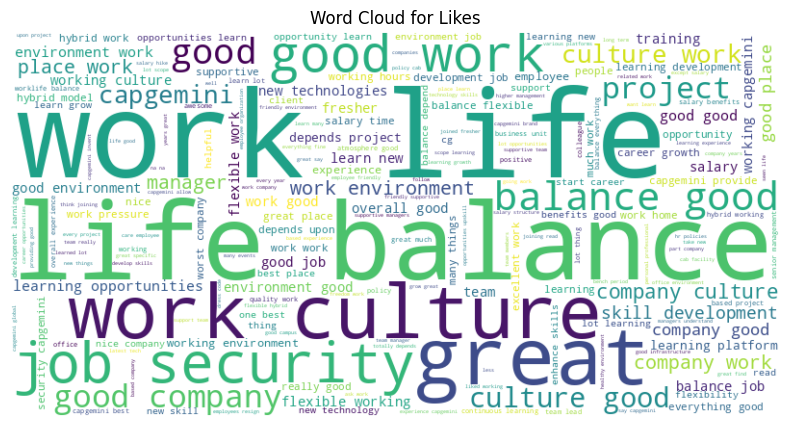

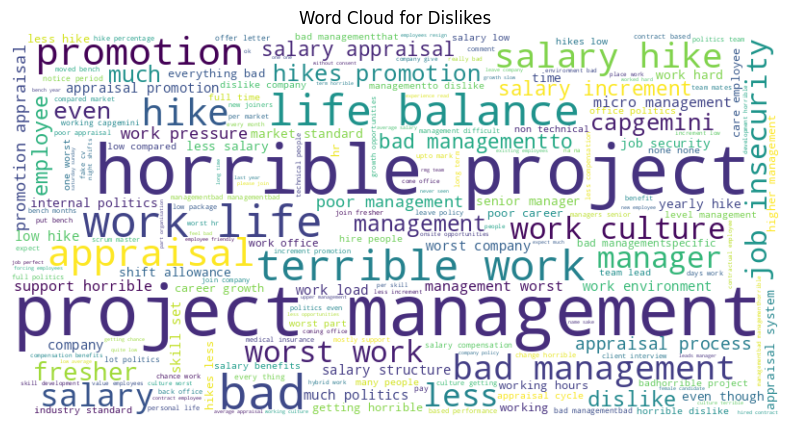

In [ ]:
#visualize the most frequent words in 'Likes' and 'Dislikes' review from the employees
Likes_text=' '.join([' '.join(review) for review in df['Likes']])
Dislikes_text=' '.join([' '.join(review) for review in df['Dislikes']])

#Using the clean_text function to remove commonly used words that does not add value
clean_text(Likes_text)
clean_text(Dislikes_text)

#Creating a worldcloud for the 'Likes' and 'Dislikes' column
Likes_wordcloud=WordCloud(width=800, height=400, background_color='white').generate(Likes_text)
Dislikes_wordcloud=WordCloud(width=800, height=400, background_color='white').generate(Dislikes_text)

#Plot the 'Likes_wordcloud and Dislikes_worldcloud'
plt.figure(figsize=(10,5))
plt.imshow(Likes_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Likes')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(Dislikes_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Dislikes')
plt.show()

In [ ]:
# Defining a function to remove punctuation
def remove_punctuation(text):
    text = str(text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the function to 'Likes' and 'Dislikes' columns
df['Likes'] = df['Likes'].apply(remove_punctuation)
df['Dislikes'] = df['Dislikes'].apply(remove_punctuation)

# Displaying the cleaned dataFrame
print(df[['Likes', 'Dislikes']].head())

                                               Likes  \
0  deserved candidates promoted promptly unbiased...   
1  got lot learning platform monthly learning pla...   
2  based business unit get experience company pol...   
3          client projects good use latest tech work   
4  worked ibm years tcs year company years comple...   

                                            Dislikes  
0  designation promotions badsalary increment als...  
1  get fully tech horrible project management var...  
2  top level management people bring bad name com...  
3  culture micro management unprofessional behavi...  
4  medical insurance amount quite low compare tcs...  


# Exploratory Data Analysis

The exploratory data analysis involves data visualization  and
applying machine learning models and deep learning models on the dataset to better understand the dataset.

Distribution of Ratings

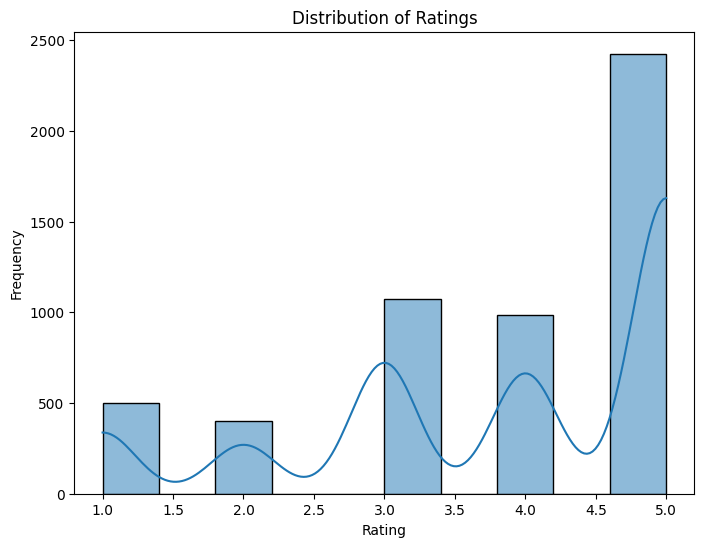

In [ ]:
#Plotting the ratings columns
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Rating', bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Distribution of Departments

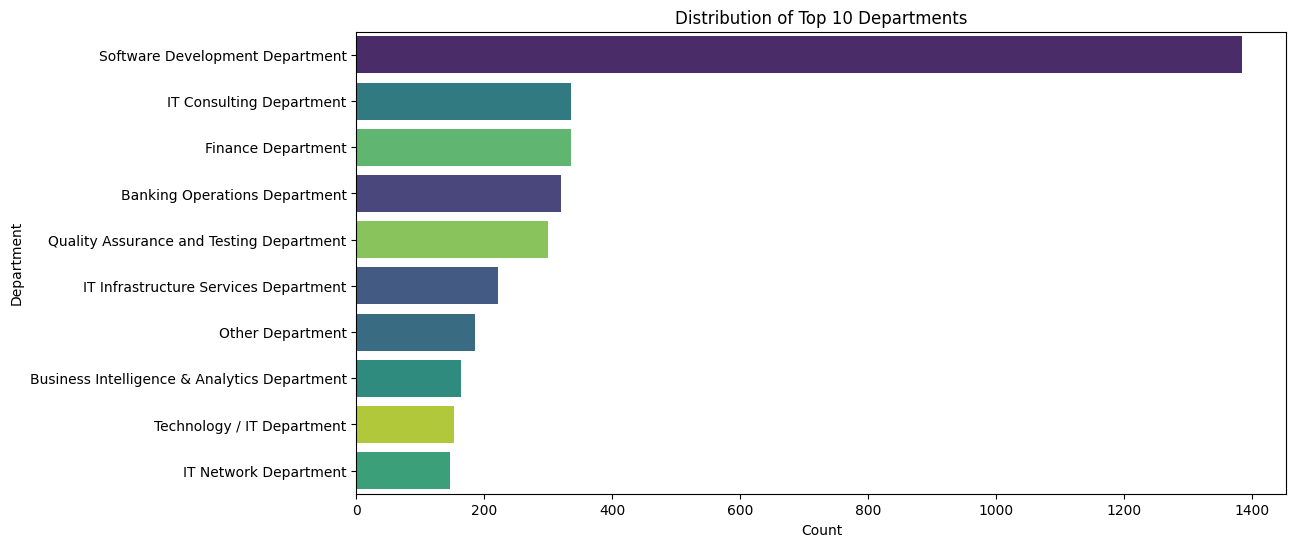

In [ ]:
# Plotting the top 10 Department column
plt.figure(figsize=(12, 6))

# Getting the top 10 departments
top_10_departments = df['Department'].value_counts().nlargest(10).index

# Filtering the DataFrame to include only the top 10 departments
filtered_df = df[df['Department'].isin(top_10_departments)]

# Define a color palette for the plots
colors = sns.color_palette("viridis", n_colors=10)

# Plot the countplot for the top 10 departments
sns.countplot(data=filtered_df, y='Department', order=top_10_departments, hue='Department', palette=colors, legend=False)

plt.title('Distribution of Top 10 Departments')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

Job Type Distribution


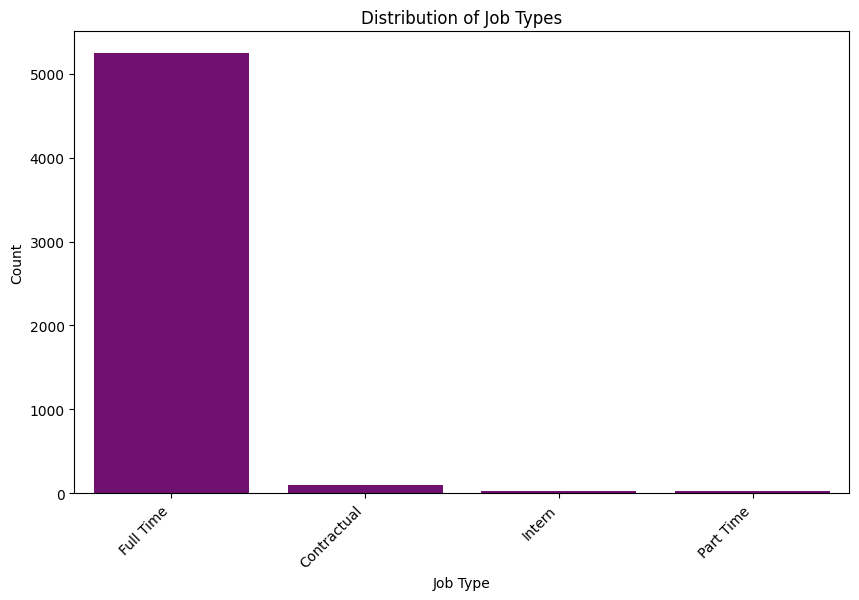

In [ ]:
# Plotting the Job Type column
plt.figure(figsize=(10, 6))

#Plotting the Job Type
sns.countplot(data=df, x='Job_type', order=df['Job_type'].value_counts().index, color='purple')

plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Distribution of Word Length

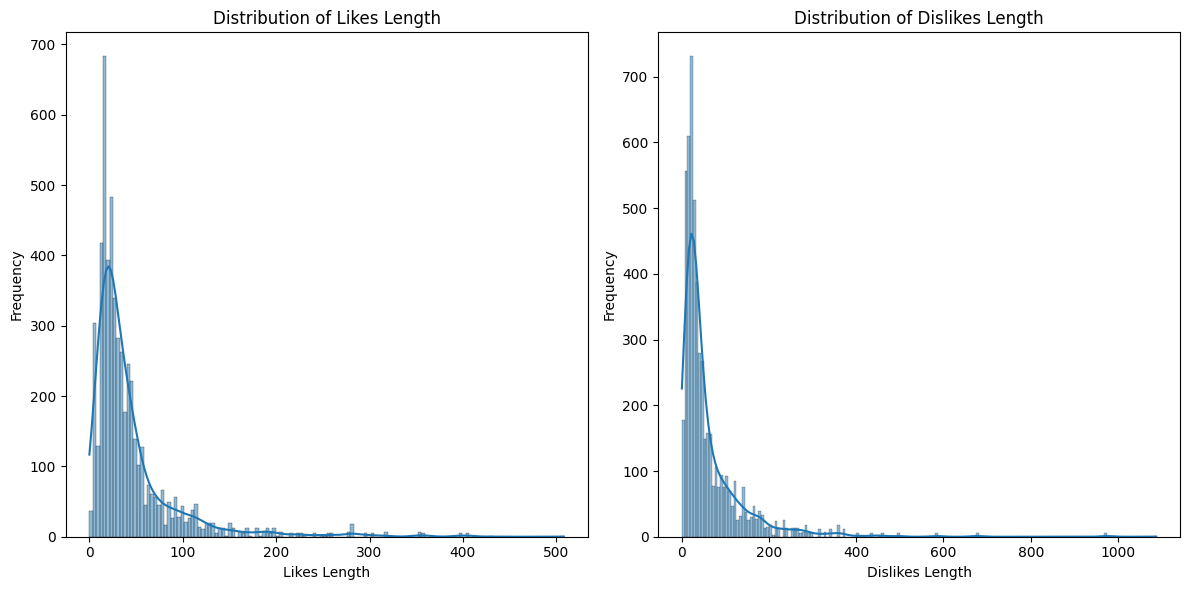

In [ ]:
#Plot the word length for the likes and dislikes column
# Calculate the length of 'Likes' and 'Dislikes' for each row
df['Likes_length'] = df['Likes'].apply(len)
df['Dislikes_length'] = df['Dislikes'].apply(len)

# Create subplots for 'Likes' and 'Dislikes' length distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 'Likes' length distribution
sns.histplot(df['Likes_length'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Likes Length')
axes[0].set_xlabel('Likes Length')
axes[0].set_ylabel('Frequency')

# Plot 'Dislikes' length distribution
sns.histplot(df['Dislikes_length'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of Dislikes Length')
axes[1].set_xlabel('Dislikes Length')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Distribution of Top 20 Most Frequent Words

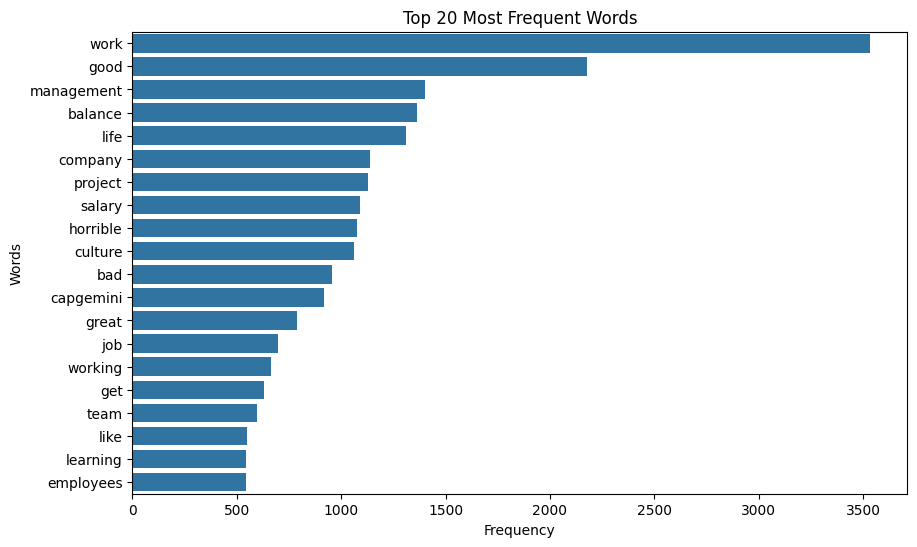

In [ ]:

# Combine the 'Likes' and 'Dislikes' columns into a new column 'Combined_text'
df['Combined_text'] = df['Likes'].astype(str) + ' ' + df['Dislikes'].astype(str)

# Combine all text from the 'Combined_text' column into a single string
all_text = ' '.join(df['Combined_text'].astype(str).tolist())

# Tokenizing the text and create a frequency distribution
word_frequencies = Counter(all_text.split())

# Showing/filter the most common top 20 words
top_words = word_frequencies.most_common(20)

# Extract words and frequencies for plotting
words = [word for word, frequency in top_words]
frequencies = [frequency for word, frequency in top_words]

plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies, y=words, orient='h')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# SENTIMENT ANALYSIS

The dataset has three labels positive, neutral and negative which would be encoded as a numerical labels for machine learning model. The VADER was used to get the sentiment score of each text by calculating the polarity score of the text. The label encoder was used for converting categorical columns that is the 'Postive', 'Neutral', 'Negative' into numerical values.

In [ ]:
#Initializing the sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

#Defining a function for the VADER  to get the sentiment scores of the text
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df['Sentiment_Score'] = df['Combined_text'].apply(get_sentiment_scores)

df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda score: 'Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral')

print(df[[ 'Combined_text','Sentiment_Score' ]].head(10))

                                       Combined_text  Sentiment_Score
0  deserved candidates promoted promptly unbiased...           0.6486
1  got lot learning platform monthly learning pla...          -0.0460
2  based business unit get experience company pol...           0.7906
3  client projects good use latest tech work cult...          -0.7506
4  worked ibm years tcs year company years comple...           0.8078
5  good learning platforms skill development full...           0.6249
6  flexible timing good project learning growth a...           0.8225
7  stay without project without work bench nobody...          -0.8779
8  experience might vary based project tagged con...           0.9022
9  learning new features project work life balanc...          -0.6705


In [ ]:
#Defining a function for the label encoder to convert catergicals 'Postive', 'Neutral' and 'Negative' to numerical
def sentiment_encoded(df):
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to the 'Sentiment' column
    df['Encoded_sentiment'] = label_encoder.fit_transform(df['Sentiment'])

    # Display the original and encoded sentiment columns
    return df[['Sentiment', 'Encoded_sentiment']]


encodedlabels = sentiment_encoded(df)
print(encodedlabels)

     Sentiment  Encoded_sentiment
0     Positive                  2
1      Neutral                  1
2     Positive                  2
3     Negative                  0
4     Positive                  2
...        ...                ...
5493  Positive                  2
5494  Positive                  2
5495  Positive                  2
5496  Positive                  2
5497  Positive                  2

[5389 rows x 2 columns]


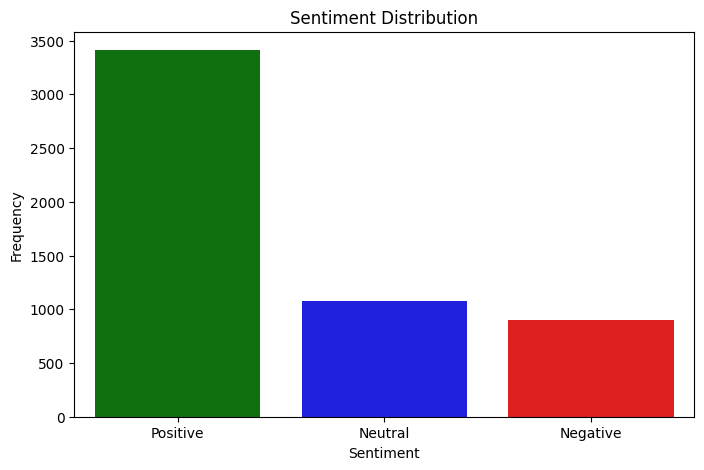

In [ ]:
# Plot and display the sentiment label
plt.figure(figsize=(8, 5))

# Plot the sentiment distribution
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index,
              hue='Sentiment', palette=['green', 'blue', 'red'], legend=False)

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Accessing the 'Sentiment' column using df['Sentiment']
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

,count
Sentiment,
Positive,3412
Neutral,1074
Negative,903


#Text Vectorization

Here, the text data is converted into numerical formats that machine learning models can understand using the TF-IDF Vectorization. TF-IDF gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a dataset.

TF-IDF

In [ ]:
# Encode the sentiment labels
encodedlabels = sentiment_encoded(df)

# Combine the 'Likes' and 'Dislikes' columns into a new column 'Combined_text'
df['Combined_text'] = df['Likes'].astype(str) + ' ' + df['Dislikes'].astype(str)

# Define features (X) and target (y)
# The likes and dislikes
X = df['Combined_text']
 # Positive, Negative, Neutral Sentiment labels
y = df['Encoded_sentiment']

# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialize the TF-IDF vectorizer with a maximum of 4000 features
tfidf = TfidfVectorizer(max_features=4000)

# Fit and transform the training data, then transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Three machine learning models was applied to compare the trained model accuracy and two deep learing models was applied

Machince Learning Model: Multinomial Naïve Bayes Bayes, Support Vector Machine (SVM), Random Forest.

Deep Learning Model: Long Short-term Memory(LSTM), Convolutional Neural Network and Recurrent Neural Network

The Multinomial Naïve Bayes Bayes Classifier

The Multinomial Naïve Bayes Bayes Classifier is machine learning model used to train and learn the datasets. This approach features can estimate the likelihood of a word to be positive or negative which is why its suitaability for this analysis


Naive Bayes Train Accuracy: 0.8754349338900487
Naive Bayes Test Accuracy: 0.8580705009276438


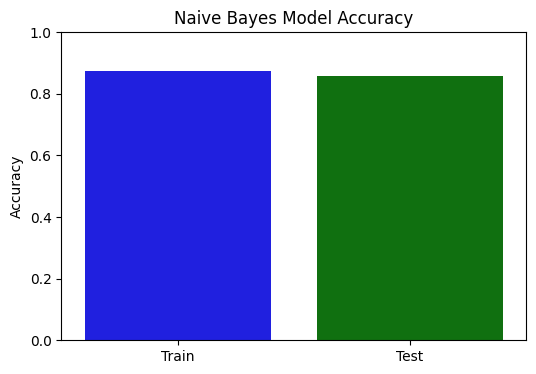

In [ ]:
# Apply and train Multinomial Naïve Bayes model
# Using the smaller alpha for less smoothing to avoid zero probability
naive_bayes = MultinomialNB(alpha=0.5)
naive_bayes.fit(X_train_tfidf, y_train)

# Predict and evaluate the model
train_acc_nb = accuracy_score(y_train, naive_bayes.predict(X_train_tfidf))
test_acc_nb = accuracy_score(y_test, naive_bayes.predict(X_test_tfidf))

#Print the accuracy result
print(f"Naive Bayes Train Accuracy: {train_acc_nb}")
print(f"Naive Bayes Test Accuracy: {test_acc_nb}")

# Defining the labels and accuracies for the plot
labels = ['Train', 'Test']
accuracies = [train_acc_nb, test_acc_nb]

# Plotting the results
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=accuracies, hue=labels, palette=['blue', 'green'], legend=False)
plt.ylim([0, 1])
plt.title('Naive Bayes Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

Support Vector Machine (SVM) is an another machine learning algorithm that was used to train the dataset. It identifies the ideal hyperplane between the positive and negative sentiment labels


Accuracy: 0.9276437847866419


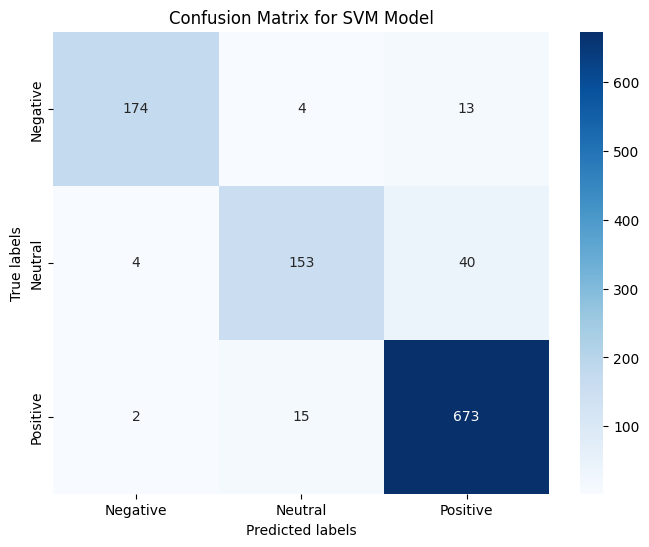

              precision    recall  f1-score   support

    Negative       0.97      0.91      0.94       191
     Neutral       0.89      0.78      0.83       197
    Positive       0.93      0.98      0.95       690

    accuracy                           0.93      1078
   macro avg       0.93      0.89      0.91      1078
weighted avg       0.93      0.93      0.93      1078



In [ ]:
# Calling up  the encode_sentiment_column function with the DataFrame 'df' as argument
encodedlabels = sentiment_encoded(df)
#Accessing the label encoder to access the class attribute
label_encoder = LabelEncoder()
label_encoder.fit(df['Sentiment'])

# Train the SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

# For model predictions
y_pred = model.predict(X_test_tfidf)

# Convert predicted labels back to sentiment labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy}")


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM Model')
plt.show()

# Print classification report
# Convert label_encoder.classes_ to a list of strings
target_names = label_encoder.classes_.tolist()
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print(classification_rep)

Random Forest Classifier

Random Forest is able to classify large dataset with accuracy. It is made up of mulitple decision trees.

              precision    recall  f1-score   support

    Negative       0.99      0.91      0.95       191
     Neutral       0.97      0.86      0.91       197
    Positive       0.94      0.99      0.96       690

    accuracy                           0.95      1078
   macro avg       0.97      0.92      0.94      1078
weighted avg       0.95      0.95      0.95      1078



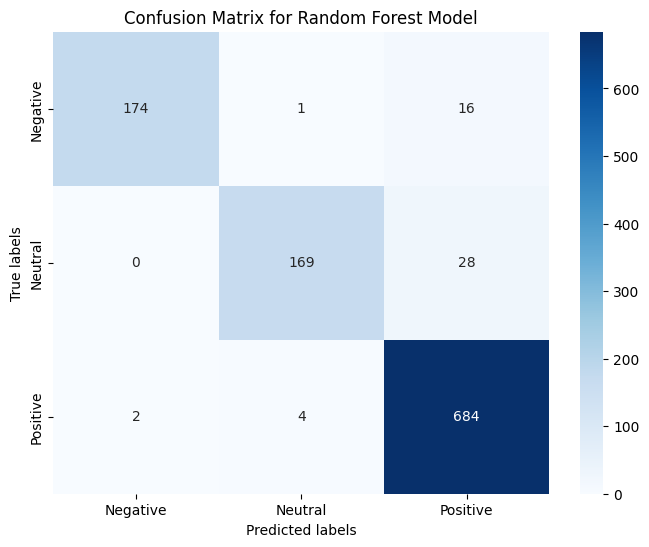

In [ ]:
# Call the encode_sentiment_column function with the DataFrame 'df' as argument
encodedlabels = sentiment_encoded(df)

#Accessing the label encoder to access the class attribute
label_encoder = LabelEncoder()
label_encoder.fit(df['Sentiment'])

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=101)

# Train the Random Forest model
rf_model.fit(X_train_tfidf, y_train)

# Predict the sentiment on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
classification_rep_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)
print(classification_rep_rf)

# Confusion matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Deep Learning Model

In order to conduct a deep learning model, the Word2Vec embedding model was used to convert the text to numerical format

Word2Vec

In [ ]:

# Tokenize the sentences in 'Combined_text' and store them in 'sentences_tokenized'
sentences_tokenized = df['Combined_text'].apply(clean_text).tolist()

# Create and train a Word2Vec model, sentences_tokenized is a list of lists, each inner list representing a sentence tokenized into words.
model_w2v = Word2Vec(sentences_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Using bracket notation to access word vectors instead of .get() and shaping word embeddings to be 2D for compatibility with LSTM
sentence_vectors = [
    np.array([model_w2v.wv[word] if word in model_w2v.wv else np.zeros(model_w2v.vector_size) for word in sentence]).reshape(-1, model_w2v.vector_size)
    for sentence in sentences_tokenized]

# Pad the sequences so that they are all of the same length
max_length = max(len(sentence) for sentence in sentence_vectors)
sentence_vectors_padded = pad_sequences(sentence_vectors, maxlen=max_length, dtype='float32', padding='post')


Recurrent Neural Network

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.5501 - loss: 0.9941 - val_accuracy: 0.6308 - val_loss: 0.9121
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.6189 - loss: 0.9451 - val_accuracy: 0.6308 - val_loss: 0.9122
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.6295 - loss: 0.9299 - val_accuracy: 0.6308 - val_loss: 0.9122
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.6305 - loss: 0.9269 - val_accuracy: 0.6308 - val_loss: 0.9119
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.6305 - loss: 0.9257 - val_accuracy: 0.6308 - val_loss: 0.9126
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6284 - loss: 0.9237 - val_accuracy: 0.6308 - val_loss: 0.9120
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.6305 - loss: 0.9209 - val_accuracy: 0.6308 - val_loss: 0.9119
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6305 - loss: 0.9196

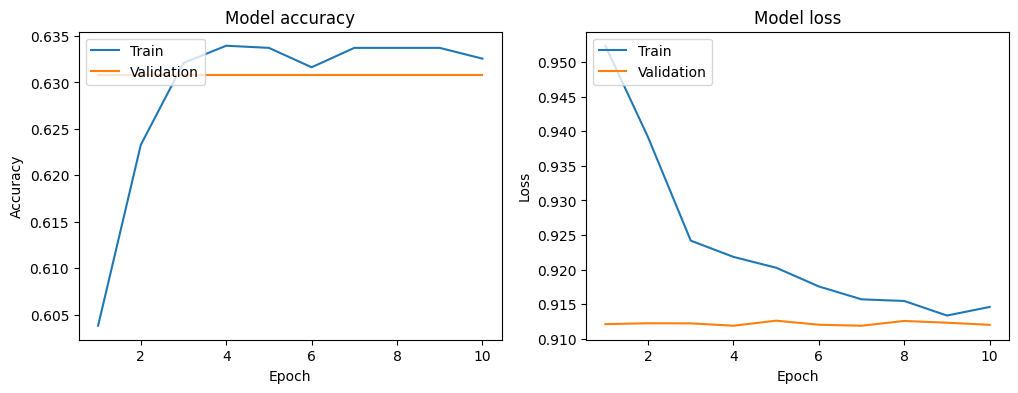

In [ ]:
# Call the encode_sentiment_column function with the DataFrame 'df' as argument
encodedlabels = df['Encoded_sentiment'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentence_vectors_padded, encodedlabels, test_size=0.2, random_state=42)

# Defining the SimpleRNN
model = Sequential()

# Input layer to define the input shape
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

#SimpleRNN layer
model.add(SimpleRNN(50, activation='tanh'))

# Dropout layer for regularization
model.add(Dropout(0.6))

# Dense layer for multi-class classification (3 classes)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with training data, validation data, and EarlyStopping
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), shuffle=False, callbacks=[early_stopping])


# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy[1] * 100:.2f}%")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Train')
sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Train')
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

Long Short Term Memory


Long Short-Term Memory(LSTM) is a type of RNN that help capture long-range dependencies in sequences. This model was applied to the dataset


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5441 - loss: 1.0017 - val_accuracy: 0.6308 - val_loss: 0.8970
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.6340 - loss: 0.8944 - val_accuracy: 0.6382 - val_loss: 0.8691
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6360 - loss: 0.8666 - val_accuracy: 0.6391 - val_loss: 0.8606
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5115 - loss: nan - val_accuracy: 0.1679 - val_loss: nan
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.1671 - loss: nan - val_accuracy: 0.1679 - val_loss: nan
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1653 - loss: nan - val_accuracy: 0.1679 - val_loss: nan
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1707 - loss: nan - val_accuracy: 0.1679 - val_loss: nan
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.1650 - loss: nan - val_accuracy: 0.1679 - val_loss: nan
34/34 ━━━━━━━━━━━━━━━━

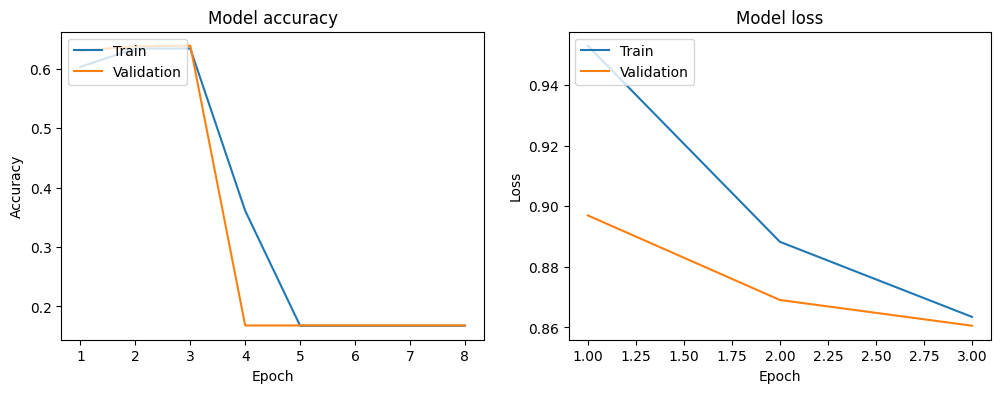

In [ ]:

# Get the encoded sentiment labels
encodedlabels = df['Encoded_sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentence_vectors_padded, encodedlabels, test_size=0.2, random_state=42)

# Define the model
model = Sequential()

# Input layer to define the input shape
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Creating the Bidirectional LSTM Layer with 100 units and ReLU activation
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a Dropout layer for regularization
model.add(Dropout(0.3))

# Dense Layer for Classification, output size is 3 for sentiment classes
model.add(Dense(3, activation='softmax'))

# Compile the model using Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with a higher batch size using epochs 30 for faster training
history = model.fit( X_train,  y_train,  epochs=30, batch_size=256,  validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=1 )

# Evaluate on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Create a subplot for accuracy
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Train')
sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Train')
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


Convolutional Neural Network


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 98, 32)              │           9,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 96, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 48, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           4,611 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,347 (67.76 KB)

 Trainable params: 17,347 (67.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
17/17 - 5s - 315ms/step - accuracy: 0.6089 - loss: 1.0176 - val_accuracy: 0.6308 - val_loss: 0.9312
Epoch 2/100
17/17 - 4s - 214ms/step - accuracy: 0.6337 - loss: 0.9120 - val_accuracy: 0.6308 - val_loss: 0.8954
Epoch 3/100
17/17 - 2s - 96ms/step - accuracy: 0.6356 - loss: 0.8786 - val_accuracy: 0.6382 - val_loss: 0.8790
Epoch 4/100
17/17 - 3s - 178ms/step - accuracy: 0.6370 - loss: 0.8581 - val_accuracy: 0.6401 - val_loss: 0.8689
Epoch 5/100
17/17 - 1s - 88ms/step - accuracy: 0.6437 - loss: 0.8429 - val_accuracy: 0.6438 - val_loss: 0.8533
Epoch 6/100
17/17 - 2s - 129ms/step - accuracy: 0.6574 - loss: 0.8213 - val_accuracy: 0.6521 - val_loss: 0.8402
Epoch 7/100
17/17 - 1s - 67ms/step - accuracy: 0.6669 - loss: 0.8037 - val_accuracy: 0.6558 - val_loss: 0.8253
Epoch 8/100
17/17 - 1s - 73ms/step - accuracy: 0.6746 - loss: 0.7868 - val_accuracy: 0.6614 - val_loss: 0.8151
Epoch 9/100
17/17 - 1s - 74ms/step - accuracy: 0.6834 - loss: 0.7675 - val_accuracy: 0.6679 - val_loss: 0.79

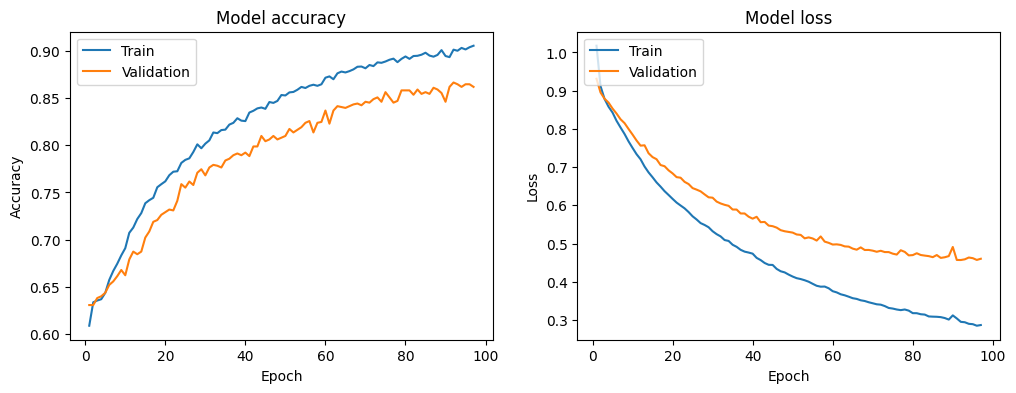

In [ ]:

# Get the encoded sentiment labels
encodedlabels = df['Encoded_sentiment'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentence_vectors_padded, encodedlabels, test_size=0.2, random_state=42)

# Adding a Limit sequence length for faster training
max_length = 100
X_train = np.array([x[:max_length] for x in X_train])
X_test = np.array([x[:max_length] for x in X_test])

# Pad sequences to ensure they are of equal length

X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Convert labels to categorical for multi-class classification
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Defining embedding dim and getting the embedding dimension from X_train
embedding_dim = X_train.shape[2]

# Create the CNN model using the Functional API
inputs = Input(shape=(max_length, embedding_dim))
x = Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
x = Conv1D(filters=32, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
outputs = Dense(3, activation='softmax')(x)

# Creating the model
model = Model(inputs=inputs, outputs=outputs)


# Compile the model with categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Summarize the model
model.summary()

# Fit the model and store the history with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=2, callbacks=[early_stopping])

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Train')
sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Train')
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()